In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv('rpmpwmcalibration.csv')

In [4]:
df.head()

,Datetime,Target RPM,Actual RPM,PWM Signal
0,2021/5/18 1:11:6,0.0,0.0,700
1,2021/5/18 1:11:6,0.0,0.0,700
2,2021/5/18 1:11:6,0.0,0.0,700
3,2021/5/18 1:11:6,0.0,0.0,700
4,2021/5/18 1:11:7,0.0,0.0,700


In [8]:
df.columns

Index(['Datetime', ' Target RPM', ' Actual RPM', ' PWM Signal'], dtype='object')

In [9]:
df[' Target RPM'].dtype

dtype('float64')

In [80]:
pwm = df[' PWM Signal'].values
rpm = df[' Actual RPM'].values

In [81]:
pwms = np.unique(pwm)[1:-1]

In [82]:
rpms = []
for p in pwms:
    r = rpm[pwm==p]
    rpms.append(np.mean(r[-10:]))
rpms = np.array(rpms)

In [83]:
popt = np.polyfit(rpms,pwms, 3)
pwms_fit = np.polyval(popt, rpms)
pwms_residual = pwms_fit-pwms

Text(0, 0.5, 'ESC PWM Signal')

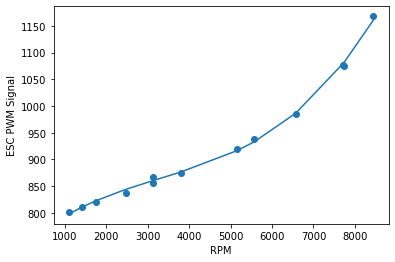

In [84]:
plt.scatter(rpms, pwms)
plt.plot(rpms, pwms_fit)
plt.xlabel('RPM')
plt.ylabel('ESC PWM Signal')

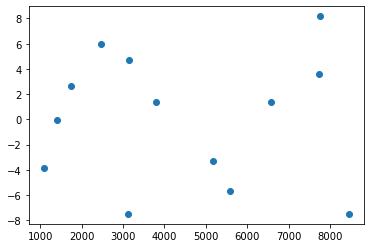

In [85]:
plt.scatter(rpms, pwms_residual)

In [86]:
popt

array([ 1.29239574e-09, -1.28689654e-05,  6.63914326e-02,  7.39221611e+02])

In [89]:
def rpm_to_pwm(rpm):
    return 0.00000000129*rpm*rpm*rpm - 0.000012869*rpm*rpm + 0.06639*rpm + 739.2216

Text(0, 0.5, 'ESC PWM Signal')

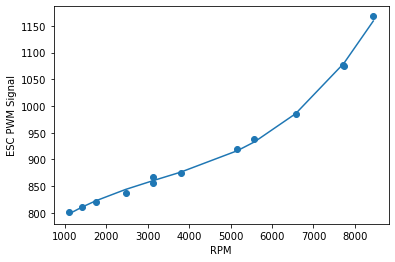

In [90]:
plt.scatter(rpms, pwms)
plt.plot(rpms, rpm_to_pwm(rpms))
plt.xlabel('RPM')
plt.ylabel('ESC PWM Signal')

In [92]:
rpm_lut = np.linspace(1000, 10000)
pwm_lut = np.polyval(popt, rpm_lut)

Text(0, 0.5, 'ESC PWM Signal')

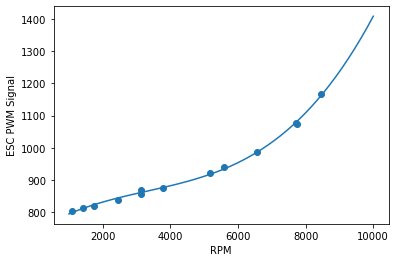

In [93]:
plt.scatter(rpms, pwms)
plt.plot(rpm_lut, pwm_lut)
plt.xlabel('RPM')
plt.ylabel('ESC PWM Signal')